#### Vivian Xia

## Implement a Recursive Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

from random import seed
from random import random

from tabulate import tabulate

In [2]:
def fact(x):
    time.sleep(0.30)
    if x == 1:
        return 1
    else:
        return x * fact(x-1)

def fact_iter(x):
    time.sleep(0.30)
    ans = 1
    for i in range(1,x+1): 
        ans = ans * i 
    return ans

In [3]:
def factorial(number):
    """ Calculate and Time the Factorial Algorithms.
    
    Time the calculation of the number using the iterative and recursive algorithm.
    
    Parameters
    ----------
    number: integer whose factorial is calculated.
    
    """
    
    start_time = time.perf_counter()
    fact_iter(number) #iterative 
    end_time = time.perf_counter()
    fact_iter_time = end_time - start_time
    
    start_time = time.perf_counter()
    fact(number) #recursive
    end_time = time.perf_counter()
    fact_time = end_time - start_time
    
    difference = fact_time - fact_iter_time 
        
    return number, fact_iter_time, fact_time, difference

In [4]:
np.random.seed(12345) #set random number seed
list = np.random.randint(100, 500, 10) #generate random array with 10 numbers between 100 and 500

In [5]:
time_list = [] #empty list to store times
solution_list = [] #empty list to store solutions

for number in list:
    time_list.append(factorial(number))

<ipython-input-2-de9b1b7d5b6f>:6: RuntimeWarning: overflow encountered in long_scalars
  return x * fact(x-1)


In [6]:
col_names = ["Number","Time recursive","Time iterative","Recursive Minus Iterative Time"]

print(tabulate(sorted(time_list), headers=col_names, tablefmt="fancy_grid"))

╒══════════╤══════════════════╤══════════════════╤══════════════════════════════════╕
│   Number │   Time recursive │   Time iterative │   Recursive Minus Iterative Time │
╞══════════╪══════════════════╪══════════════════╪══════════════════════════════════╡
│      129 │         0.301709 │          39.1409 │                          38.8392 │
├──────────┼──────────────────┼──────────────────┼──────────────────────────────────┤
│      134 │         0.304115 │          40.6135 │                          40.3094 │
├──────────┼──────────────────┼──────────────────┼──────────────────────────────────┤
│      218 │         0.302517 │          66.1582 │                          65.8556 │
├──────────┼──────────────────┼──────────────────┼──────────────────────────────────┤
│      229 │         0.303371 │          69.4758 │                          69.1725 │
├──────────┼──────────────────┼──────────────────┼──────────────────────────────────┤
│      357 │         0.305226 │         108.245  │    

In [7]:
#factorial for each value in the list -- too large to store in table or dataframe
for number in list:
    print(f"The factorial of {number} is {fact_iter(number)}.")

The factorial of 385 is 77789258200022682857262524611415309149847055830033034109882689650252194969679085094625004160614777142840032749700960018016880257150600760973387063625465151973977979879777238796637512249859636989563488396079390053459321567631753747632959254354510911723355274009752250302167318747380739790814322278867448117858757749562590484682648929702787022262746051020728642181787640182285101009794037643386965050892754788419216225960187559786147684262118679388088477835523732297315903458517415743852458900263831761206810157984267061814227152746582087453048037976549155699326580418348947419613236026536061943703203702535568264627840497844830538486783779191495261331727855882465027081574803712043311976266948667916187775974266352925870275040925817241600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000.
The factorial of 229 is 337329882812466313122311926038816584452780527434588407187128892362823670114843032156658782636718085104731043579108349231

In [8]:
df = pd.DataFrame(time_list) #create a dataframe of the list of times
df.columns = col_names
df

,Number,Time recursive,Time iterative,Recursive Minus Iterative Time
0,385,0.305528,116.781322,116.475794
1,229,0.303371,69.475833,69.172462
2,482,0.305437,146.151518,145.846081
3,457,0.301853,138.620877,138.319023
4,134,0.304115,40.613526,40.309411
5,129,0.301709,39.140906,38.839197
6,357,0.305226,108.245242,107.940016
7,218,0.302517,66.158159,65.855642
8,469,0.304686,142.280447,141.975761
9,415,0.302736,125.852155,125.549419


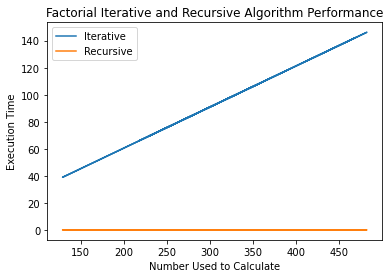

In [9]:
plt.plot(df['Number'], df['Time iterative'], label = 'Iterative')
plt.plot(df['Number'], df['Time recursive'], label = "Recursive")

plt.title('Factorial Iterative and Recursive Algorithm Performance')
plt.xlabel('Number Used to Calculate')
plt.ylabel('Execution Time')
plt.legend()

plt.show()

An iterative algorithm loops through a set of instructions until the answer is found and the condition is satisfied. A recursive algorithm calls upon the function itself until the answer is found. One advantage of the recursive method is that it is usually simpler code-wise than the iterative method. The recursive method has a base and recursive case. The recursive case is when the function calls itself, and the base case is when the function does not call itself again. In this case, the base case is achieved when the number reaches 1, otherwise the recursive case continues calling the function again. As the function is called again, the calling function is partially completed and still in the call stack until the called function finished and pops off the stack. This stacking takes up a lot of memory. The iterative method, on the other hand, does not use much memory when looping through since it does not need to keep saving the partially completed functions in its call stack. 

As seen from the plot, the recursive algorithm execution time increases as the number whose factorial is being calculated increases. The rate of the time increases along with the value.On the other hand, the iterative algorithm stays around the same execution time for all the values used to calculate. The difference between the execution times for recursive and iterative can be seen getting wider and wider as the value increases. This increasing larger difference can also be seen by going down that difference column in the table. The time complexity of the recursive method exponentially grows while that of the iterative method scales with the larger input values. 

The difference in algorithms is useful for data engineers because there are memory and time complexity differences between the two. The iterative algorithm does not take up memory and is scalable in terms of time complexity. The recursive method often simplifies the code but takes up memory and its time complexity does not scale well. 